In [5]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [7]:
# test if CUDA is available
[torch.cuda.is_available(), torch.backends.cudnn.enabled]

[True, True]

In [42]:
# load customized, pre-trained wide-resnet

model_file = 'wideresnet18_places365.pth.tar'

import wideresnet
#arch = wideresnet.resnet18(num_classes=3)
#checkpoint = torch.load(model_file, map_location=lambda storage, loc: storage)
#state_dict = {str.replace(k,'module.',''): v for k,v in checkpoint['state_dict'].items()}
#arch.load_state_dict(state_dict)

arch = resnet18

# well let's just use the imagenet

# this is a pre-trained network based on the imagenet
#arch = resnet18()
#arch
arch

<function torchvision.models.resnet.resnet18(pretrained=False, **kwargs)>

In [30]:
image_size = 256 # image size
PATH = 'data'
batch_size = 64

tfms = tfms_from_model(arch, image_size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs = batch_size)
data


In [31]:
# the number of training & validation images
# check the number of images in the data directory using the command: tree | wc -l
[len(data.trn_y), len(data.val_y), data.classes]

[36500, 36500, ['indoor', 'nature', 'outdoor']]

In [32]:
learn = ConvLearner.pretrained(arch, data)
learn

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=(1, 1), ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d

In [33]:
learn._get_crit(data)

<function torch.nn.functional.nll_loss(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True)>

In [34]:
learn.freeze()

In [36]:
lrf=learn.lr_find()

 83%|████████▎ | 474/571 [03:58<00:48,  1.99it/s, loss=2.59] 

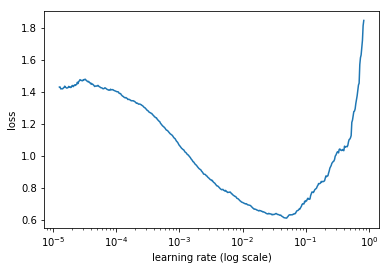

In [37]:
learn.sched.plot()

In [39]:
lr = 0.01

In [41]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

  0%|          | 0/571 [00:00<?, ?it/s]
epoch      trn_loss   val_loss   accuracy                    
    0      0.489968   0.431494   0.828466  
    1      0.490879   0.418741   0.833808                    
    2      0.467303   0.408888   0.838384                    


KeyboardInterrupt: 

In [16]:
torch.cuda.empty_cache()


In [ ]:
# actually, this step is to get activation for all the images, so will run just once
# this makes some tmp files in the tmp directory


# This seems to take about 2 hours regardless

# It took 1 hour 42 minutes

learn = ConvLearner.pretrained(arch, data, precompute=True)
learn

In [ ]:
# change the number of classes
arch_mod = nn.Sequential(*children(arch)[:-2], 
                  nn.Conv2d(512, 3, 3, padding=1), 
                  nn.AdaptiveAvgPool2d(1), Flatten(), 
                  nn.LogSoftmax())
arch_mod

In [ ]:
learn = ConvLearner.from_model_data(arch, data, precompute=True)


In [ ]:
learn.freeze()

In [ ]:
lrf=learn.lr_find()

In [ ]:
learn.sched.plot()